<a href="https://colab.research.google.com/github/anagjurchinova/VNP_2025/blob/main/data_preparation_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

data = pd.read_csv('/content/sample_data/current-employee-names-salaries-and-position-titles-1.csv')
data.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,$101442.00,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,$94122.00,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,$101592.00,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,$110064.00,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,$19.86


In [2]:
data.isnull().mean() * 100

,0
Name,0.000000
Job Titles,0.000000
Department,0.000000
Full or Part-Time,0.000000
Salary or Hourly,0.000000
Typical Hours,75.824971
Annual Salary,24.175029
Hourly Rate,75.824971


In [3]:
data_clean = data.copy()
data_clean

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,$101442.00,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,$94122.00,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,$101592.00,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,$110064.00,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,$19.86
...,...,...,...,...,...,...,...,...
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,$72510.00,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,$48078.00,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,$90024.00,NaN
33181,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,$93354.00,NaN


In [40]:
data_clean['Annual Salary'] = data_clean['Annual Salary'].replace('[\$]',"", regex=True)
data_clean['Annual Salary'] = pd.to_numeric(data_clean['Annual Salary'])

In [12]:
data_clean['Hourly Rate'] = data_clean['Hourly Rate'].replace('[\$]',"", regex=True)
data_clean['Hourly Rate'] = pd.to_numeric(data_clean['Hourly Rate'])

data_clean

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
...,...,...,...,...,...,...,...,...
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN
33181,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


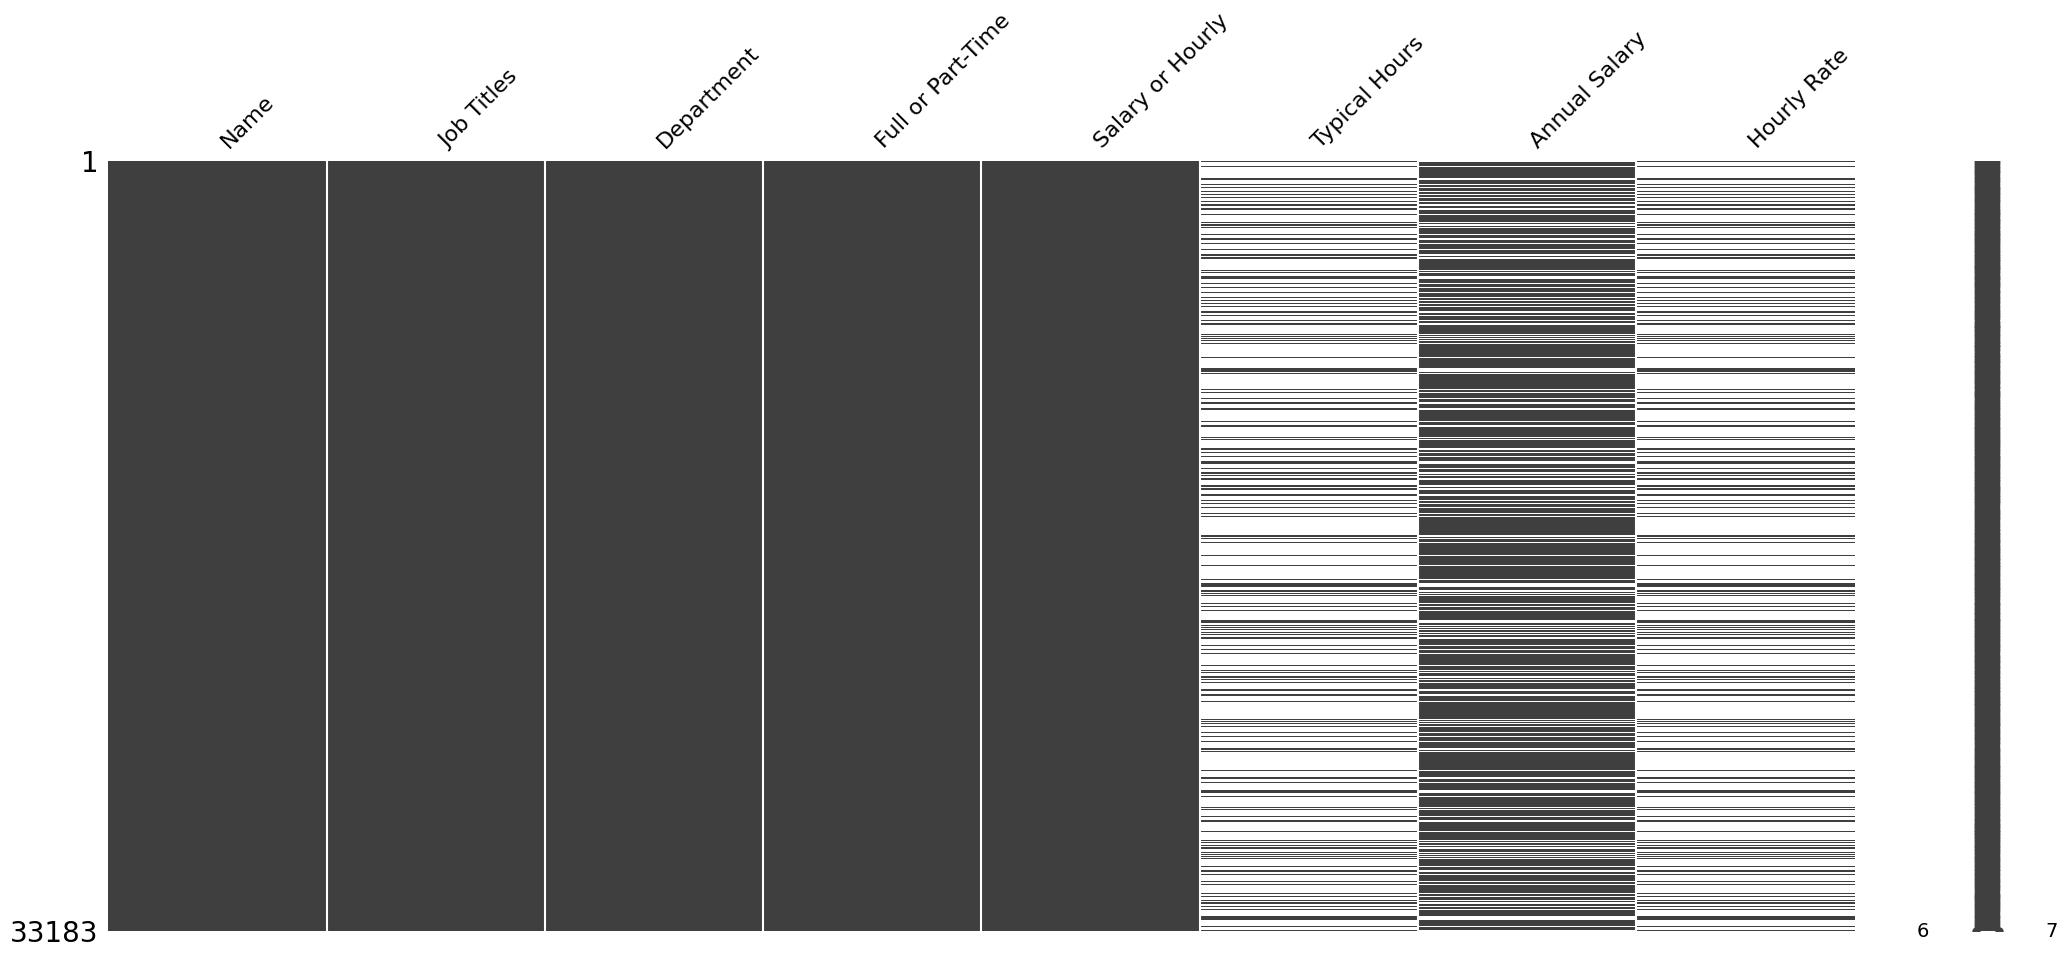

In [13]:
msno.matrix(data_clean)
plt.show()

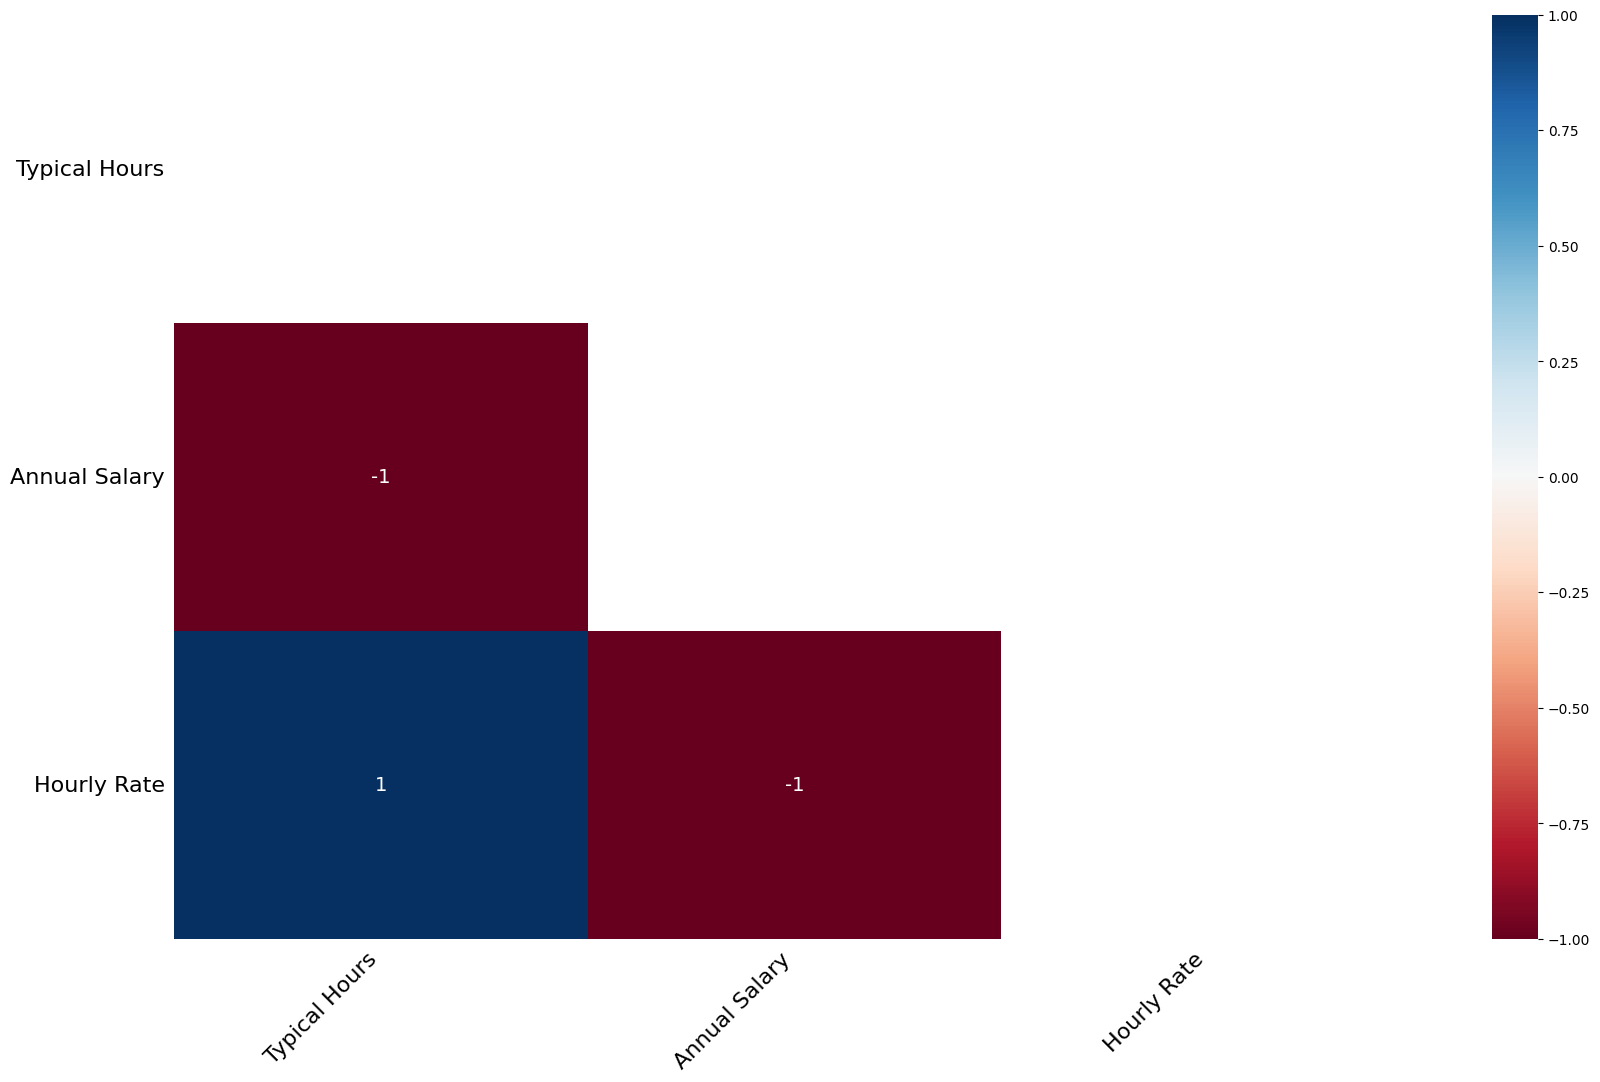

In [14]:
msno.heatmap(data_clean)
plt.show()

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


In [16]:
data_clean['Typical Hours'] = pd.to_numeric(data_clean['Typical Hours'])

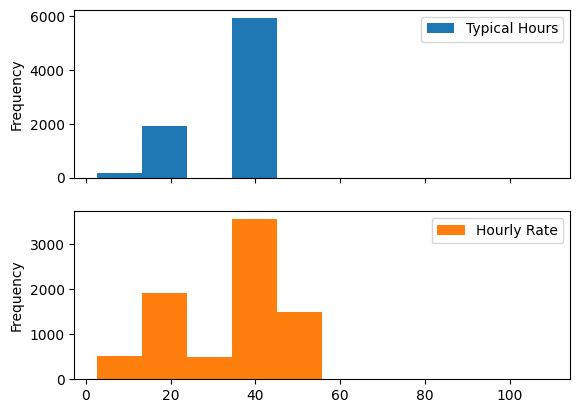

In [18]:
data_clean[['Typical Hours', 'Hourly Rate']].plot.hist(subplots=True)
plt.show()

In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_clean[['Typical Hours', 'Hourly Rate']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [21]:
data_clean[['Typical Hours', 'Hourly Rate']] = imputed_data
data_clean.isnull().mean() * 100

,0
Name,0.000000
Job Titles,0.000000
Department,0.000000
Full or Part-Time,0.000000
Salary or Hourly,0.000000
Typical Hours,0.000000
Annual Salary,24.175029
Hourly Rate,0.000000


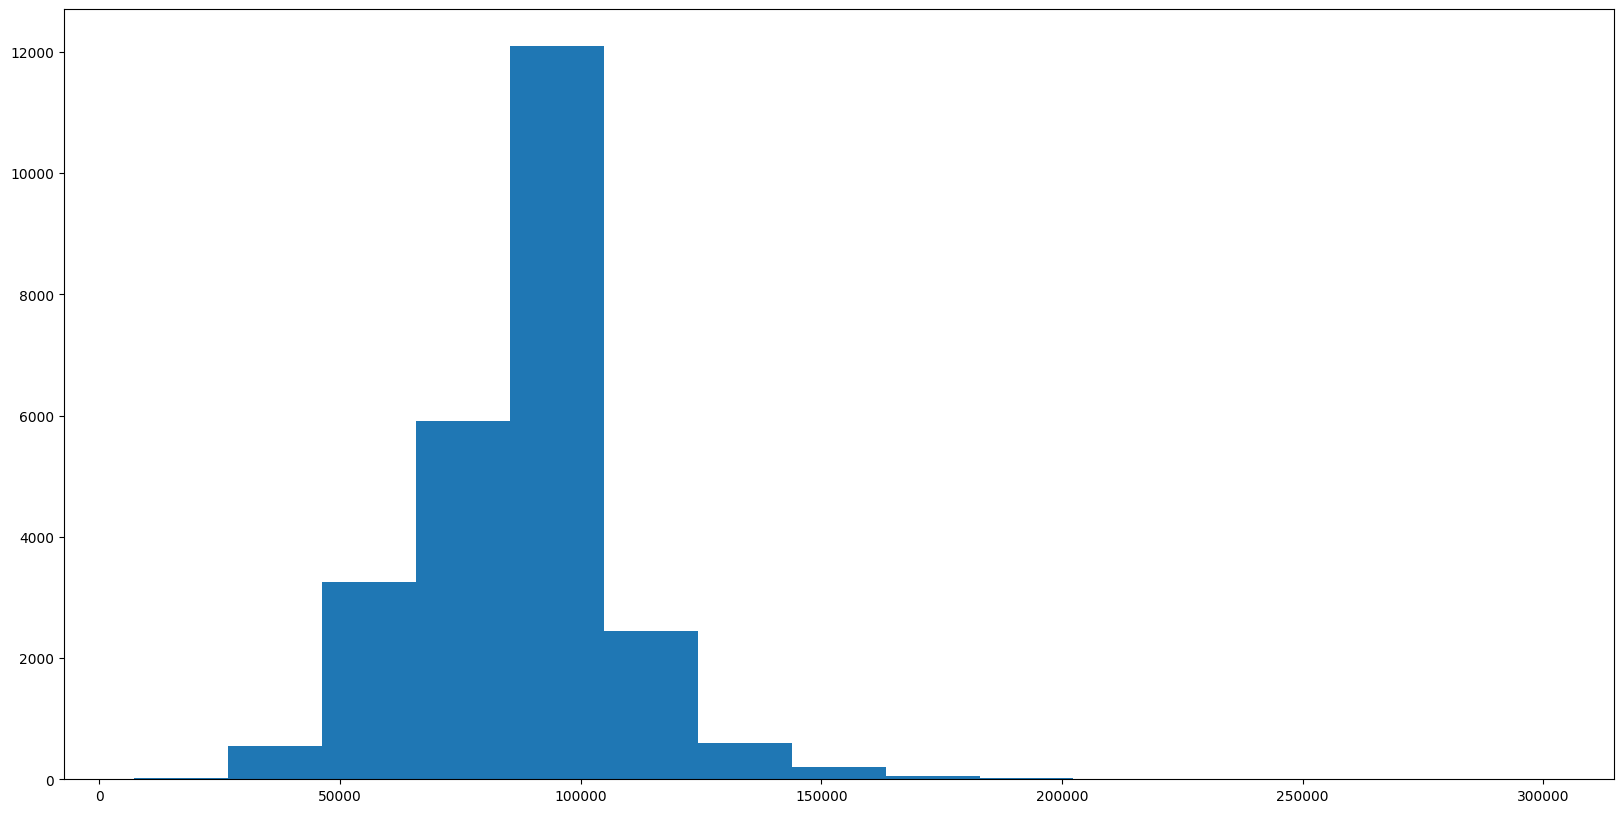

In [22]:
plt.figure(figsize=(20, 10))
plt.hist(data_clean['Annual Salary'], bins=15)
plt.show()

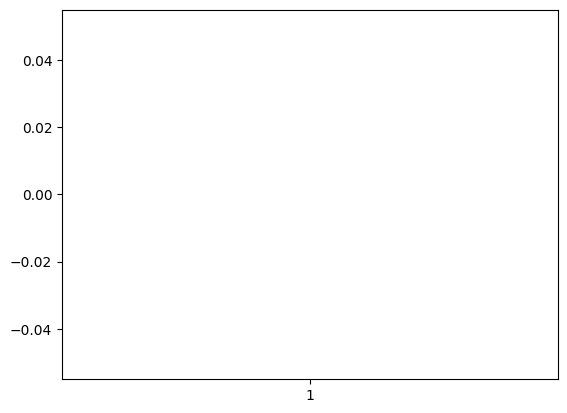

In [23]:
plt.boxplot(data_clean['Annual Salary'])
plt.show()

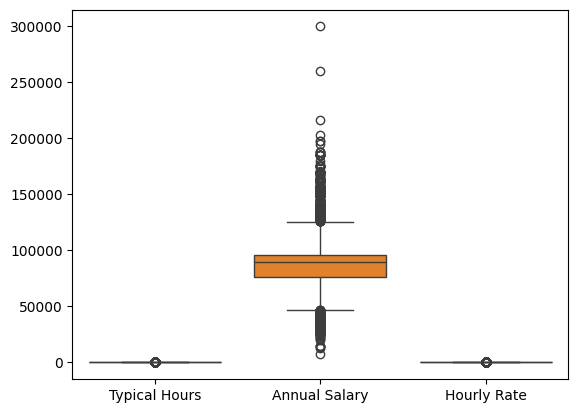

In [24]:
sns.boxplot(data=data_clean)
plt.show()

In [44]:
data_clean['Annual Salary']

,Annual Salary
0,101442.0
1,94122.0
2,101592.0
3,110064.0
4,NaN
...,...
33178,72510.0
33179,48078.0
33180,90024.0
33181,93354.0


In [47]:
data_clean['Annual Salary'] = pd.to_numeric(data_clean['Annual Salary'])
data_clean['Annual Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 33183 entries, 0 to 33182
Series name: Annual Salary
Non-Null Count  Dtype  
--------------  -----  
25161 non-null  float64
dtypes: float64(1)
memory usage: 259.4 KB


In [53]:
# data.ShoppingMall = data.ShoppingMall.fillna(data.ShoppingMall.median())
data_clean['Annual Salary'] = data_clean['Annual Salary'].fillna(data_clean['Annual Salary'].median())
# data_clean['Annual Salary'].median()
data_clean.isnull().mean() * 100

,0
Name,0.0
Job Titles,0.0
Department,0.0
Full or Part-Time,0.0
Salary or Hourly,0.0
Typical Hours,0.0
Annual Salary,0.0
Hourly Rate,0.0
